<a href="https://colab.research.google.com/github/khushimalik3122/salary-predictor-19/blob/main/Copy_of_sp19_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('/content/drive/MyDrive/sp_19_app/finalcleaned_dataset.csv')

In [40]:
df.shape

(1806, 172)

In [41]:
df.describe()

,Unnamed: 0,Rating,Easy Apply,Min Salary (K),Max Salary (K),Avg Salary (K),Company_Encoded,Salary Range (K),Log Avg Salary
count,1806.000000,1806.000000,1806.0,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000
mean,941.878738,3.268439,0.0,3.953735,4.483971,71.773533,6.291620,36.690476,2.062650
std,550.457778,1.373428,0.0,0.236729,0.197558,14.568786,1.019781,12.999680,0.047979
min,0.000000,0.000000,0.0,3.526361,4.110874,47.000000,0.000000,6.000000,1.964874
25%,463.250000,3.100000,0.0,3.761200,4.330733,60.000000,5.858646,29.000000,2.025498
50%,944.500000,3.600000,0.0,3.931826,4.465908,70.000000,6.624729,37.000000,2.061188
75%,1425.750000,4.000000,0.0,4.094345,4.634729,79.000000,7.033286,46.000000,2.091831
max,1881.000000,5.000000,0.0,4.584967,4.882802,106.000000,7.313887,64.000000,2.159500


In [42]:
print(df.columns)

Index(['Unnamed: 0', 'Rating', 'Company Name', 'Easy Apply',
       'Salary Estimate Cleaned', 'Min Salary (K)', 'Max Salary (K)',
       'Avg Salary (K)', 'Job City', 'Job State',
       ...
       'Job Title Simplified_Data Scientist', 'Job Title Simplified_Engineer',
       'Job Title Simplified_Intern', 'Job Title Simplified_Lead Analyst',
       'Job Title Simplified_Manager', 'Job Title Simplified_Senior Analyst',
       'Job Title Group', 'Job Title Cleaned', 'Salary Range (K)',
       'Log Avg Salary'],
      dtype='object', length=172)


# EDA

# 1. Which job roles, locations, and companies dominate the hiring space?**

# * a.  Top 10 In-Demand Job Titles*

<ipython-input-43-584512027fa0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")


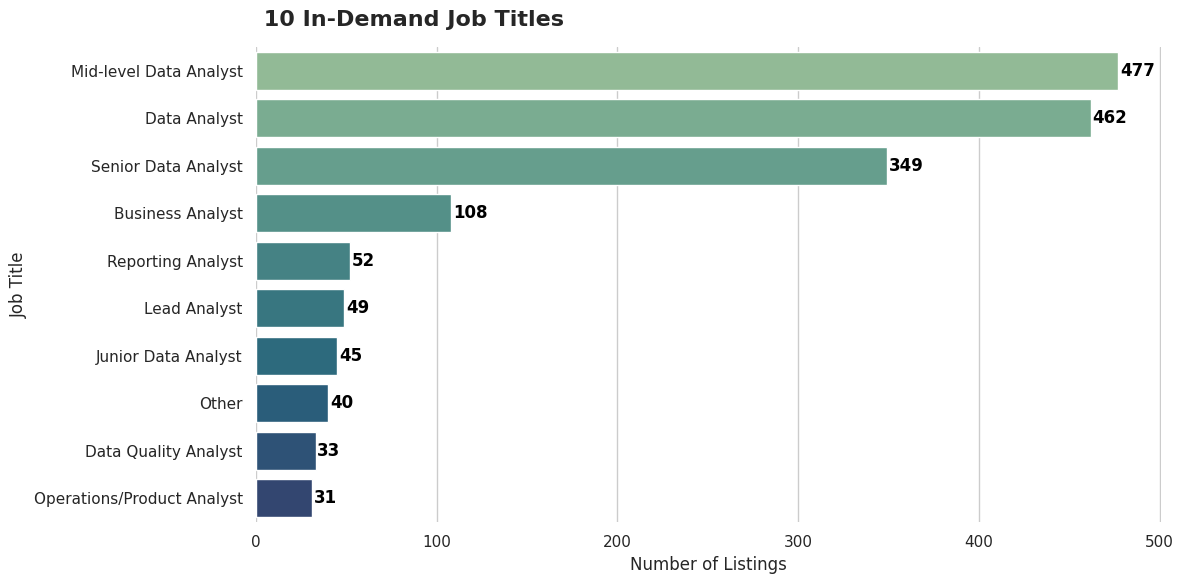

In [43]:
sns.set(style="whitegrid")


df['Job Title '] = df['Job Title Group']

# Data
top_jobs = df['Job Title Group'].value_counts().head(10)

#  figure and axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")

# Title & Labels
plt.title(" 10 In-Demand Job Titles", fontsize=16, weight='bold', loc='left', pad=15)
plt.xlabel("Number of Listings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)

#  count labels next to bars
for i, v in enumerate(top_jobs.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

# Final result
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# ** b. Top 10 Hiring Locations bold text**

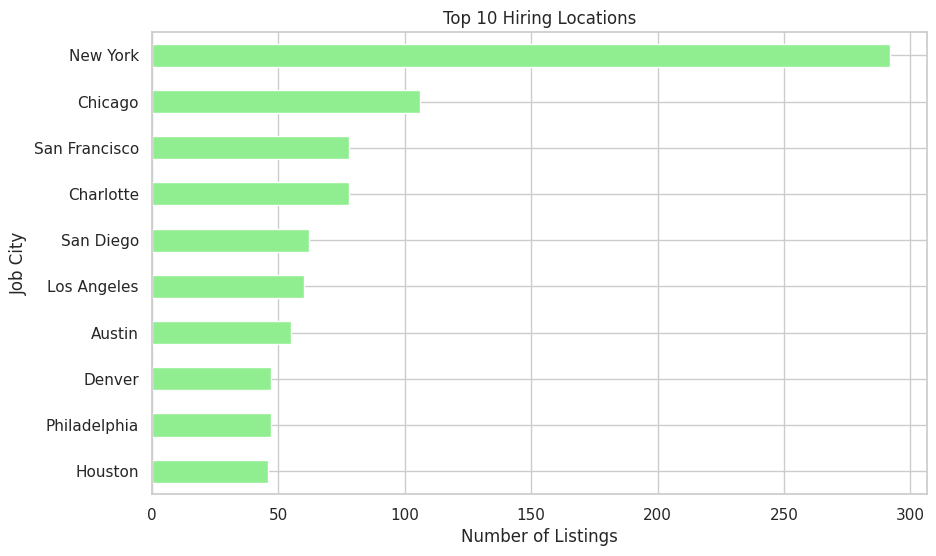

In [44]:
top_locations = df['Job City'].value_counts().head(10)
top_locations.plot(kind='barh', figsize=(10,6), color='lightgreen')
plt.title("Top 10 Hiring Locations")
plt.xlabel("Number of Listings")
plt.gca().invert_yaxis()
plt.show()

# ** c. Top 10 Companies Hiring**

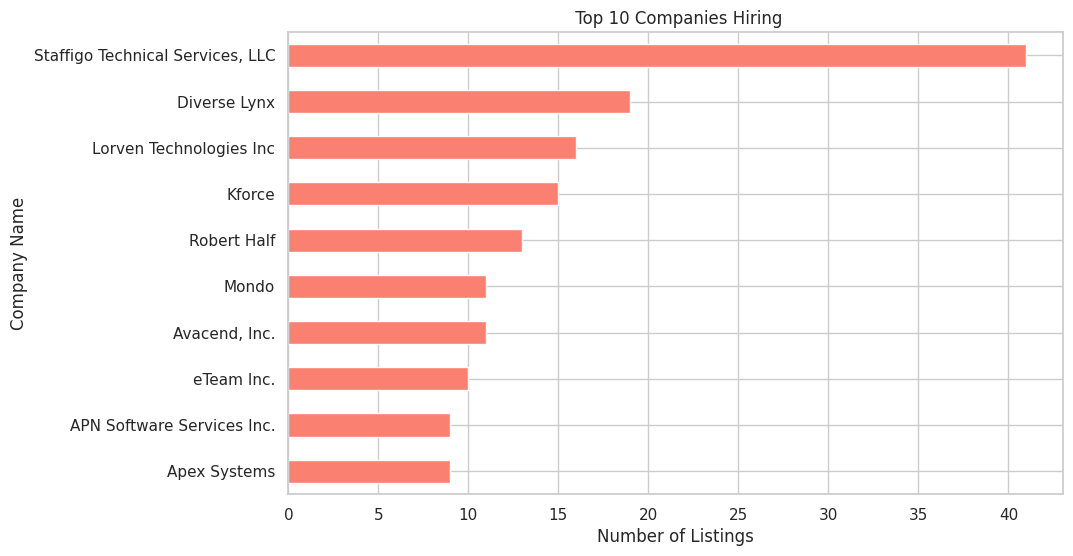

In [45]:

if 'Company Name' in df.columns:
	top_companies = df['Company Name'].value_counts().head(10)
	top_companies.plot(kind='barh', figsize=(10,6), color='salmon')
	plt.title(" Top 10 Companies Hiring")
	plt.xlabel("Number of Listings")
	plt.gca().invert_yaxis()
	plt.show()
else:
	print("Column 'Company Name' not found in the DataFrame.")


# **How do company rating and job location impact average salaries?
# company Rating vs Avg Salaryt**

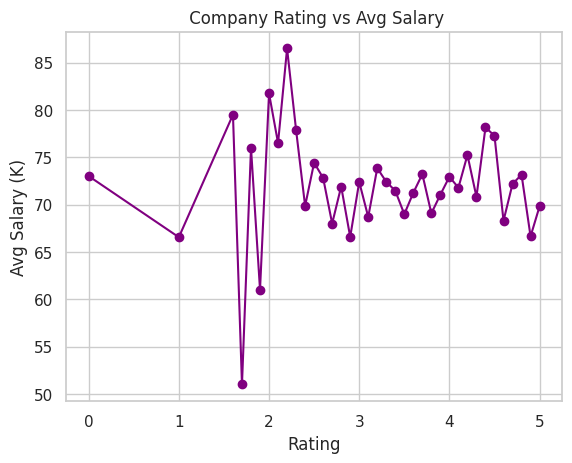

In [24]:
df['Rating'] = df['Rating'].replace(-1, 0)

rating_salary = df.groupby('Rating')['Avg Salary (K)'].mean().sort_index()
rating_salary.plot(kind='line', marker='o', color='purple')
plt.title(" Company Rating vs Avg Salary")
plt.xlabel("Rating")
plt.ylabel("Avg Salary (K)")
plt.grid(True)
plt.show()

# ***Top Paying Locations***

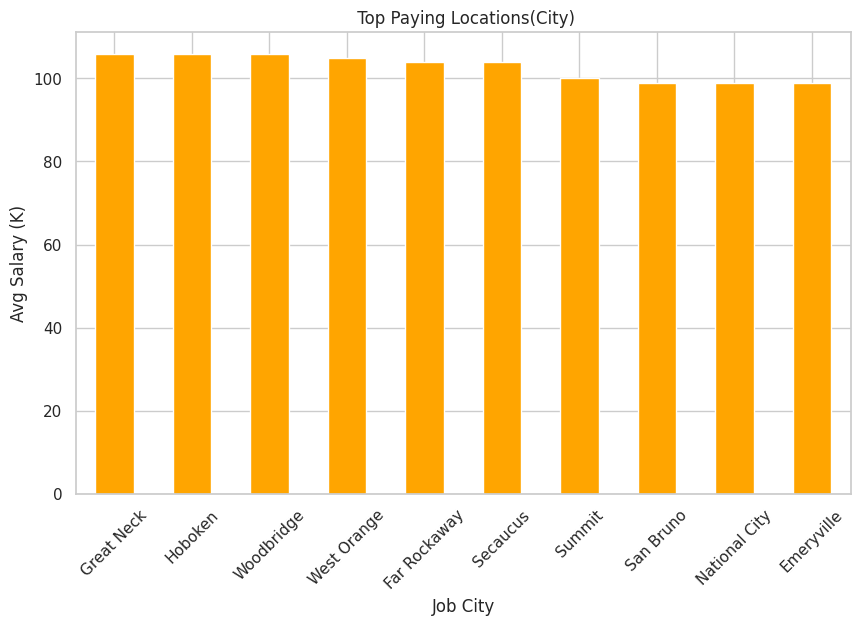

In [46]:
location_salary = df.groupby('Job City')['Avg Salary (K)'].mean().sort_values(ascending=False).head(10)
location_salary.plot(kind='bar', figsize=(10,6), color='orange')
plt.title(" Top Paying Locations(City)")
plt.ylabel("Avg Salary (K)")
plt.xticks(rotation=45)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Step 1: Drop irrelevant columns
columns_to_drop = [
    'Unnamed: 0', 'Salary Estimate Cleaned','Min Salary (K)', 'Max Salary (K)','Salary Range (K)', 'Log Avg Salary'
]
df = df.drop(columns=columns_to_drop)

# Step 2: Define target and features
target = 'Avg Salary (K)'
y = df[target]
X = df.drop(columns=[target])

# Step 3: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

# Step 4: Build preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Model pipelines
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit models
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Step 7: Evaluate models
def evaluate(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return {
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R²': round(r2, 2)
    }

lr_results = evaluate(lr_pipeline, X_test, y_test, "Linear Regression")
rf_results = evaluate(rf_pipeline, X_test, y_test, "Random Forest")

lr_results, rf_results


({'Model': 'Linear Regression', 'MAE': 71.74, 'RMSE': 127.42, 'R²': -70.34},
 {'Model': 'Random Forest', 'MAE': 10.24, 'RMSE': 13.87, 'R²': 0.15})

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Add feature - 'Seniority' from Job Title
def extract_seniority(title):
    title = str(title).lower()
    if "senior" in title or "sr" in title:
        return "Senior"
    elif "junior" in title or "jr" in title:
        return "Junior"
    elif "lead" in title:
        return "Lead"
    elif "manager" in title:
        return "Manager"
    elif "director" in title:
        return "Director"
    else:
        return "Other"

df['Seniority'] = df['Job Title Group'].apply(extract_seniority)

# Step 2: Add feature - 'Location Tier'
df['Location Tier'] = df['Job State']

# Step 3: Drop old salary columns again just to be safe
df = df.drop(columns=[col for col in df.columns if 'salary' in col.lower() and col != 'Avg Salary (K)'])

# Step 4: Define new target and features
target = 'Avg Salary (K)'
y = df[target]
X = df.drop(columns=[target])

# Step 5: Log-transform the target to reduce skew
y_log = np.log1p(y)

# Step 6: Identify categorical and numerical columns again
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

In [49]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

def train_model(X, y_log, preprocessor):
    # Define the pipeline with Gradient Boosting
    gb_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])

    # Define hyperparameter tuning space for Gradient Boosting
    param_grid = {
       'regressor__n_estimators': [100, 200],
       'regressor__learning_rate': [0.05, 0.1],
       'regressor__max_depth': [3, 5],
       'regressor__subsample': [0.8, 1.0],
       'regressor__min_samples_split': [2, 5]
    }

    # Perform hyperparameter tuning using RandomizedSearchCV
    search = RandomizedSearchCV(gb_pipeline, param_distributions=param_grid,
                                n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)

    # Train/Test Split
    X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

    try:
        # Fit the model
        search.fit(X_train, y_train_log)
    except Exception as e:
        print(f"Error during model training: {e}")
        return None

    # Evaluate the model
    best_model = search.best_estimator_
    y_pred_log = best_model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Revert log transformation
    y_actual = np.expm1(y_test_log)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    r2 = r2_score(y_actual, y_pred)

    # Get feature importances
    feature_names = search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
    importances = search.best_estimator_.named_steps['regressor'].feature_importances_
    top_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:20]

    return mae, rmse, r2, top_features

target = 'Avg Salary (K)'
y = df[target]
X = df.drop(columns=[target])
# Define the preprocessor
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


mae, rmse, r2, top_features = train_model(X, y_log, preprocessor)
print(f"MAE: {mae}, RMSE: {rmse}, R2: {r2}")
print("Top features:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

MAE: 10.512730786843592, RMSE: 13.546202228931046, R2: 0.19369273536707665
Top features:
cat__Location Tier_CA: 0.1064237127594609
cat__Job State_CA: 0.08367671812528073
cat__Job City_San Diego: 0.06887974947185034
cat__Job State_IN: 0.056838818708641464
cat__Location Tier_IN: 0.04691626299588164
num__Company_Encoded: 0.03780047619228209
cat__Job Title Group_Data Analyst: 0.022835891026947445
cat__HQ State_NJ: 0.020067436436199557
cat__Job Title _Data Analyst: 0.018782803874112904
cat__Job State_FL: 0.016789056701524883
cat__Company Name_Kelly IT: 0.01615981499932838
cat__Job Title Cleaned_Analyst: 0.014253965794449156
cat__HQ City_Pearland: 0.014098818944743406
cat__Job City_Anaheim: 0.013791004204918
cat__Job City_Houston: 0.012239598191183703
cat__Location Tier_WA: 0.011875744010908478
cat__Job City_San Antonio: 0.011542362975932764
cat__Company Name_Creative Data Resources: 0.011356137969759117
cat__Company Name_Intercontinental Exchange, Inc.: 0.010890463883224217
cat__Job City_Pa

In [53]:
# Check if search has a best_estimator_ attribute
#if hasattr(search, 'best_estimator_'):
    # Get the feature names and importances
feature_names = search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
importances = search.best_estimator_.named_steps['regressor'].feature_importances_

    # Group the feature importances
grouped_importance = defaultdict(float)
for name, importance in zip(feature_names, importances):


        # Split "cat__Job City_San Diego" into "Job City"
  base_name = name.split('__')[-1].split('_')[0]
  grouped_importance[base_name] += importance

    # Get the top 10 features with the highest importances
  top_grouped = sorted(grouped_importance.items(), key=lambda x: x[1], reverse=True)[:10]

    # Print the top features
for feature, importance in top_grouped:
  print(f"{feature}: {importance:.3f}")


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [50]:
feature_names = search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
importances = search.best_estimator_.named_steps['regressor'].feature_importances_


from collections import defaultdict
grouped_importance = defaultdict(float)

for name, importance in zip(feature_names, importances):
    # Split "cat__Job City_San Diego" into "Job City"
    base_name = name.split('__')[-1].split('_')[0]
    grouped_importance[base_name] += importance


top_grouped = sorted(grouped_importance.items(), key=lambda x: x[1], reverse=True)[:10]
for feature, importance in top_grouped:
    print(f"{feature}: {importance:.3f}")


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the combined data and transform both the training and test data
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le.fit(X[col])  # Fit on the combined data
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# If the target variable is categorical, fit a separate LabelEncoder for it
if y.dtype == 'object':
    le_target = LabelEncoder()
    le_target.fit(y)
    y_train = le_target.transform(y_train)
    y_test = le_target.transform(y_test)

In [ ]:
y_train.shape
print(X_train.head())

      Rating  Company Name  Easy Apply  Job City  Job State  HQ City  \
900      3.9           696         0.0        63         13      252   
1798     2.8           422         0.0        34          3       22   
1128     3.8          1160         0.0        93         15      174   
964      1.6           658         0.0       150         13      226   
394      4.3          1125         0.0        79         16       64   

      HQ State  Skill_Python  Skill_Excel  Skill_SQL  ...  \
900         41         False        False       True  ...   
1798        60         False         True      False  ...   
1128        56         False         True       True  ...   
964         63          True        False       True  ...   
394         36         False         True      False  ...   

      Sector_Travel & Tourism  Job Title Simplified_Data Scientist  \
900                     False                                False   
1798                    False                               

In [ ]:

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor()
}


# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f"Model: {model_name}, RMSE: {rmse:.2f}")

Model: Linear Regression, RMSE: 15.71
Model: Ridge Regression, RMSE: 15.35
Model: Lasso Regression, RMSE: 14.98
Model: Elastic Net Regression, RMSE: 14.99
Model: Decision Tree Regressor, RMSE: 18.46
Model: Random Forest Regressor, RMSE: 14.17
Model: Gradient Boosting Regressor, RMSE: 14.23
Model: Support Vector Regressor, RMSE: 15.04
Model: K-Nearest Neighbors Regressor, RMSE: 16.83
Model: XGBoost Regressor, RMSE: 14.86



📌 Top 10 most important features:
Job City: 0.160
Job State: 0.123
HQ City: 0.066
Rating: 0.062
Company_Encoded: 0.061
Company Name: 0.058
Job Title Group: 0.043
HQ State: 0.042
Job Title : 0.038
Job Title Cleaned: 0.023


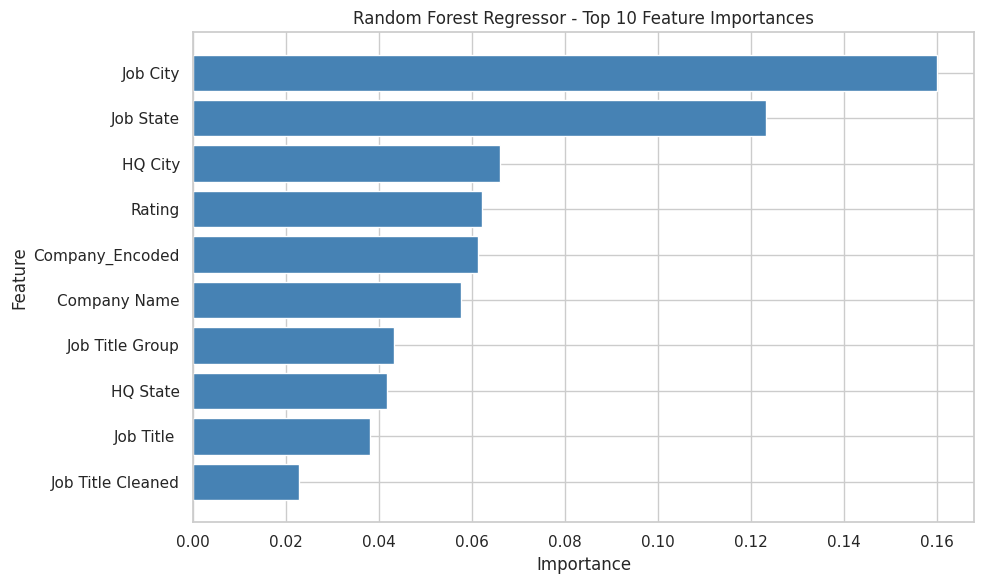

In [ ]:

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features using LabelEncoder
le = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le.fit(X[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Encode target variable if needed
if y.dtype == 'object':
    le_target = LabelEncoder()
    le_target.fit(y)
    y_train = le_target.transform(y_train)
    y_test = le_target.transform(y_test)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
column_names = X_train.columns

# Sort and select top 10
sorted_importances = sorted(zip(feature_importances, column_names), reverse=True)
top_features = sorted_importances[:10]

# Display in console
print("\n📌 Top 10 most important features:")
for importance, feature in top_features:
    print(f"{feature}: {importance:.3f}")

# Plot
importance_vals = [imp for imp, _ in top_features]
feature_labels = [name for _, name in top_features]

plt.figure(figsize=(10, 6))
plt.barh(feature_labels[::-1], importance_vals[::-1], color='steelblue')
plt.title("Random Forest Regressor - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



In [ ]:
print(X_train.head())


      Rating  Company Name  Easy Apply  Job City  Job State  HQ City  \
900      3.9           696         0.0        63         13      252   
1798     2.8           422         0.0        34          3       22   
1128     3.8          1160         0.0        93         15      174   
964      1.6           658         0.0       150         13      226   
394      4.3          1125         0.0        79         16       64   

      HQ State  Skill_Python  Skill_Excel  Skill_SQL  ...  \
900         41         False        False       True  ...   
1798        60         False         True      False  ...   
1128        56         False         True       True  ...   
964         63          True        False       True  ...   
394         36         False         True      False  ...   

      Sector_Travel & Tourism  Job Title Simplified_Data Scientist  \
900                     False                                False   
1798                    False                               

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model and the hyperparameter grid
model = GradientBoostingRegressor(random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5


# Display results
print("✅ Best Random Forest Parameters:", grid_search.best_params_)
print(f"🎯 Tuned Random Forest RMSE: {rmse:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
🎯 Tuned Random Forest RMSE: 14.13


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train your model — this is what was missing
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)  # 🔥 This line is key!

# Evaluate on training data
y_pred = model.predict(X_train)

# Cross-Validation (5-Fold)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

# Print evaluation metrics
print(f'Cross-Validation RMSE (each fold): {cv_rmse}')
print(f'Average CV RMSE: {cv_rmse.mean()}')
print(f'MAE: {mean_absolute_error(y_train, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R² Score: {r2_score(y_train, y_pred)}')


Cross-Validation RMSE (each fold): [13.9027803  13.56201728 12.46377991 13.55559228 12.26440496]
Average CV RMSE: 13.149714946861991
MAE: 8.97858533001043
RMSE: 11.311627814274841
R² Score: 0.3853134898665639


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Re-train with new features
model.fit(X_poly, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Assuming X_poly and y_train are already defined
selector = SelectFromModel(LassoCV(cv=5, random_state=42)).fit(X_poly, y_train)
X_selected = selector.transform(X_poly)


param_dist = {
    'n_estimators': randint(200, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_selected, y_train)

print("🎯 Random Search Best Params:", random_search.best_params_)
print("📉 RMSE:", -random_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.644e+01, tolerance: 2.350e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.021e+01, tolerance: 2.350e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.215e+01, tolerance: 2.350e

Fitting 5 folds for each of 50 candidates, totalling 250 fits
🎯 Random Search Best Params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 18, 'n_estimators': 386}
📉 RMSE: 12.788364453563352


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define tighter search space around best parameters
param_grid = {
    'n_estimators': [375, 386, 400],
    'max_depth': [8, 9, 10],
    'min_samples_split': [16, 18, 20],
    'min_samples_leaf': [1, 2]
}

# Use the best model as the base
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_selected, y_train)

# Final Results
print("✅ Grid Search Best Parameters:", grid_search.best_params_)
print("📉 Fine-Tuned RMSE:", -grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
✅ Grid Search Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 400}
📉 Fine-Tuned RMSE: 12.77966531997244


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a tighter search space
param_grid = {
    'n_estimators': [376, 386, 396],             # Around 386
    'max_depth': [8, 9, 10],                     # Around 9
    'min_samples_split': [16, 18, 20],           # Around 18
    'min_samples_leaf': [1, 2]                   # Around 1
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_selected, y_train)

# Results
print("🎯 Grid Search Best Params:", grid_search.best_params_)
print("📉 Final Tuned RMSE:", -grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
🎯 Grid Search Best Params: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 396}
📉 Final Tuned RMSE: 12.778994210159983


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Step 1: Polynomial Feature Expansion (if needed)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_selected)  # Make sure you're using the same X_selected from earlier

# Step 2: Define Parameter Grid
param_grid = {
    'n_estimators': [376, 386, 396],
    'max_depth': [8, 9, 10],
    'min_samples_split': [16, 18, 20],
    'min_samples_leaf': [1, 2]
}

# Step 3: Initialize and Grid Search
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_poly, y_train)

print("🎯 Grid Search Best Params:", grid_search.best_params_)
print("📉 Final Tuned RMSE:", -grid_search.best_score_)

# Step 4: Cross-Validate the Best Estimator on Full Training Data
best_rf = grid_search.best_estimator_

# RMSE scorer (positive version for cross_val_score)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

cv_scores = cross_val_score(best_rf, X_poly, y_train, cv=5, scoring=rmse_scorer)

print("🔁 Cross-Validated RMSE Scores:", cv_scores)
print("📊 Average CV RMSE:", np.mean(cv_scores))


Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np

# Convert X_train and X_test to pandas DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Log-transform skewed features
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
skewed_cols = X_train[numeric_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_cols[skewed_cols > 0.75].index

X_train[high_skew] = X_train[high_skew].apply(lambda x: np.log1p(x))
X_test[high_skew] = X_test[high_skew].apply(lambda x: np.log1p(x))

# Create interaction features separately
interaction_train = X_train[[numeric_cols[0], numeric_cols[1]]].copy()
interaction_test = X_test[[numeric_cols[0], numeric_cols[1]]].copy()

interaction_train['interaction1'] = interaction_train[numeric_cols[0]] * interaction_train[numeric_cols[1]]
interaction_test['interaction1'] = interaction_test[numeric_cols[0]] * interaction_test[numeric_cols[1]]

# Concatenate to original dataframes
X_train = pd.concat([X_train.reset_index(drop=True), interaction_train[['interaction1']].reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), interaction_test[['interaction1']].reset_index(drop=True)], axis=1)


In [ ]:
X_train = X_train.copy()
X_test = X_test.copy()


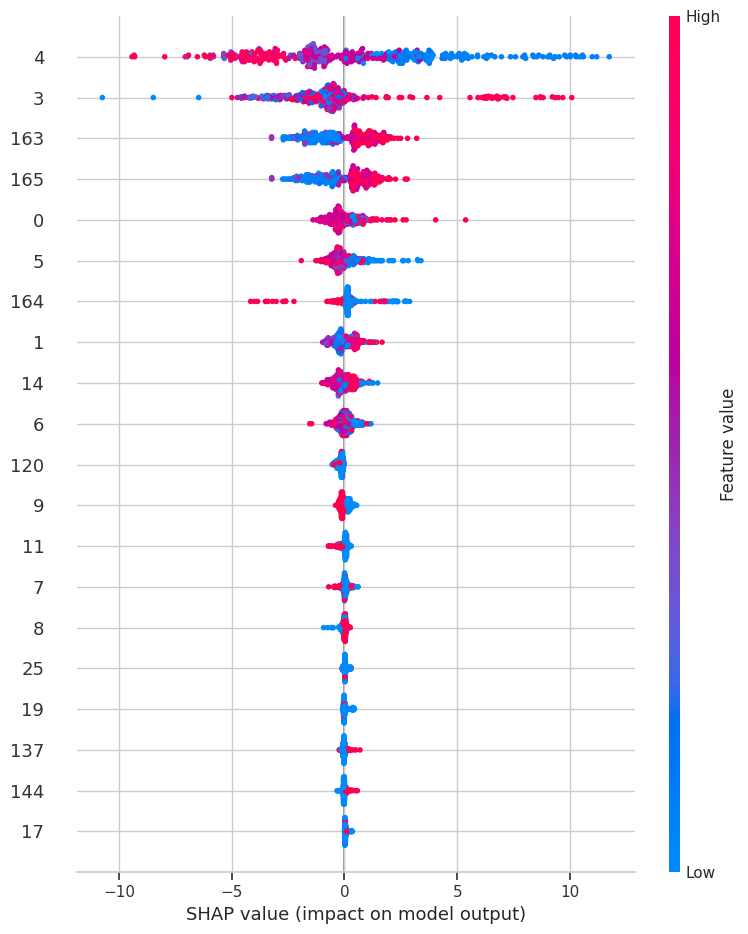

In [ ]:
import shap
explainer = shap.TreeExplainer(best_rf)  # your tuned model
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

# Force plot (local prediction explanation)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


In [ ]:
X['HQ State'] = X['HQ State'].fillna('Unknown')


In [ ]:
print(X.dtypes)
print(X.isnull().sum()[X.isnull().sum() > 0])


Rating                                 float64
Company Name                            object
Easy Apply                             float64
Job City                                object
Job State                               object
                                        ...   
Job Title Simplified_Manager              bool
Job Title Simplified_Senior Analyst       bool
Job Title Group                         object
Job Title Cleaned                       object
Job Title                               object
Length: 166, dtype: object
Series([], dtype: int64)
